<a name = 'content'></a>
# Лабораторная работа №4

### Учебная группа: М8О-409Б-18
## Рябыкин Алексей
----
## Оглавление

### [1. Задание и вариант](#step1)

### [2. Подготовительная часть](#step2)

### [3. Аналитическое решение](#step3)

### [4. Схема переменных направлений](#step4)

* [Теория](#step4.1)

* [Программная реализация](#step4.2)

* [Исследовательская часть](#step4.3)

### [5. Схема дробных шагов](#step5)

* [Теория](#step5.1)

* [Программная реализация](#step5.2)

* [Исследовательская часть](#step5.3)


<a name = "step1"></a>
# Задание
[К оглавлению](#content)

Используя схемы переменных направлений и дробных шагов, решить двумерную начально-краевую задачу для дифференциального уравнения параболического типа. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,t)$. Исследовать зависимость погрешности от сеточных параметров $\tau, h_x, h_y$.

## Вариант 7
Двумерная начально-краевая задача для дифференциального уравнения параболического типа:
$$\begin{align*} &\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} - xy\sin t,\\
&u(0,y,t) = 0,\\
&u(1,y,t) = y\cos t,\\
&u(x,0,t) = 0,\\
&u(x,1,t) = x\cos t\\
&u(x,y,0) = xy.\end{align*}$$

Аналитическое решение $U(x,y,t) = xy\cos t.$

<a name = 'step2'></a>
# Подготовительная часть

[К оглавлению](#content)

In [16]:
import numpy as np
import plotly
import plotly.graph_objs as go
import pylab
import matplotlib.pyplot as plt
import math as math
from tqdm.notebook import tqdm
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import plotly.io as pio
pio.renderers.default='notebook'

In [2]:
x0 = 0
xl = 1

y0 = 0
yl = 1
# t = 2

In [3]:
def tma(a, b, c, d, s):
    P = np.zeros(s)
    Q = np.zeros(s)

    P[0] = -c[0] / b[0]
    Q[0] = d[0] / b[0]

    k = s - 1

    for i in range(1, s):
        P[i] = -c[i] / (b[i] + a[i] * P[i - 1])
        Q[i] = (d[i] - a[i] * Q[i - 1]) / (b[i] + a[i] * P[i - 1])
    P[k] = 0
    Q[k] = (d[k] - a[k] * Q[k - 1]) / (b[k] + a[k] * P[k - 1])

    x = np.zeros(s)
    x[k] = Q[k]

    for i in range(s - 2, -1, -1):
        x[i] = P[i] * x[i + 1] + Q[i]
    return x

In [25]:
def normm(x,y,t,u):
    errors = []
    for k in range(len(u)):
        maximum = 0
        for j in range(len(u[0])):
            for i in range(len(u[0][0])):
                tmp = abs(u[k][j][i] - analytic(x[j], y[i], t[k]))
                if maximum < tmp:
                    maximum = tmp
        errors.append(maximum)
    return errors


def norm_x(x,y,t,u):
  errors = []
  maximum = 0
  for j in range(len(u)):
    for i in range(len(u[0][0])):
      tmp = abs(u[j][-1][i] - analytic(x[-1],y[i], t[j]))
      if maximum < tmp:
        maximum = tmp
    errors.append(maximum)
  return errors



def norm_y(x,y,t,u):
  errors = []
  maximum = 0
  for j in range(len(u)):
    for i in range(len(u[0])):
      tmp = abs(u[j][i][-1] - analytic(x[i],y[-1], t[j]))
      if maximum < tmp:
        maximum = tmp
    errors.append(maximum)
  return errors



def MAE(x,y,t,u):
    error = 0
    for k in range(min(len(t),len(u))):
        for x_ in range(min(len(x),len(u[0]))):
            for y_ in range(min(len(y), len(u[0][0]))):
                error += abs(u[k][x_][y_] - analytic(x[x_], y[y_],t[k]))
    return error/(len(u[0][0]) * len(u[0]) * len(u))    

def MSE(x,y,t,u):
    error = 0
    for k in range(min(len(t),len(u))):
        for x_ in range(min(len(x), len(u[0]))):
            for y_ in range(min(len(y), len(u[0][0]))):
                error += (u[k][x_][y_] - analytic(x[x_], y[y_],t[k]))**2
    return error/(len(u[0][0]) * len(u[0]) * len(u))
def plot_error(method, fix = 'y'):
    T = 20
    nx, ny = 50, 40
    hx, hy = 1/nx, 1/ny
    K = 50
    r = T/K
    u_c = method(nx=nx, ny = ny, K = K,  T = T)[-1]
    x = np.arange(x0, xl + hx, hx)
    y = np.arange(y0, yl + hy, hy)
    time = np.arange(0, T + r, r)

    print('MAE: ', MAE(x,y,time,u_c))
    print('MSE: ', MSE(x,y,time,u_c))
    er = normm(x,y,time,u_c)
    if (fix == 'x'):
      er = norm_x(x,y,time,u_c)
    if (fix == 'y'):
      er = norm_y(x,y,time,u_c)
    fig = plt.figure(figsize=(20, 10))
    plt.plot(time, er, color = 'red')
    plt.title('Error with different time', fontsize = 20)
    plt.xlabel('t')
    plt.ylabel("$\max\limits_{k,i,j}|u[k][i][j] - analytic(x[i], y[j], t[k])|$")
    plt.show()
#     fig_err = go.Figure()
#     fig_err.add_trace(go.Scatter(x=time, y=er))
#     fig_err.update_layout(title = 'Error with different time', template = 'plotly_dark', xaxis_title = 't',
#                          yaxis_title= "$\max\limits_{k,i,j}|u[k][i][j] - analytic(x[i], y[j], t[k])|$")
#     fig_err.show()

In [5]:
def analytic(x, y, t,par_a=1):
    return x*y*np.cos(t)

In [6]:
def psi(x, y,par_a=1):
    return x*y

In [7]:
def function(x,y,t):
    return -x*y*np.sin(t)

In [8]:
def fy0(x,y,par_a):
    return 0

In [9]:
def fyN(x,t,par_a):
    return x*np.cos(t)

In [10]:
def fx0(y, t, par_a):
    return 0

In [11]:
def fxN(y, t, par_a):
    return y*np.cos(t)

<a name = 'step3'></a>
# Аналитическое решение

[К оглавлению](#content)

In [12]:
x0 = 0
xl = 1
#xl = math.pi/4

y0 = 0
yl = 1
#yl = math.log(2)

T = 10

In [18]:
nx, ny = 100, 100
hx, hy = (xl-x0)/nx, (xl-x0)/ny
K = 20
r = T/K
x = [0 + i*hx for i in range(nx)]
y = [0 + i*hy for i in range(ny)]
t = [0 + i*r for i in range(K)]

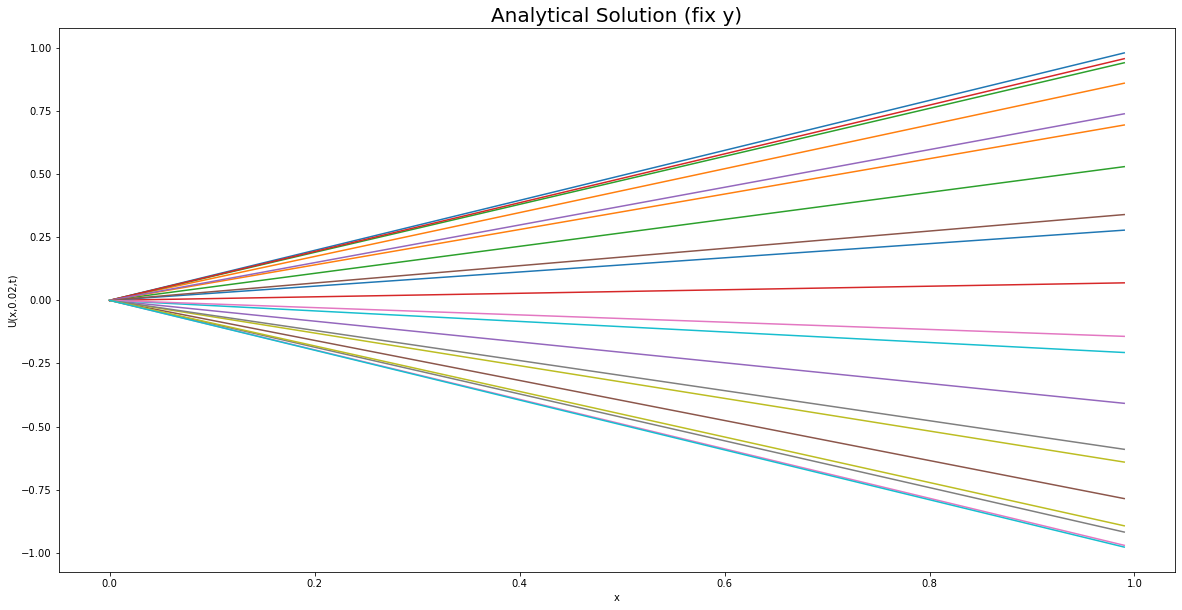

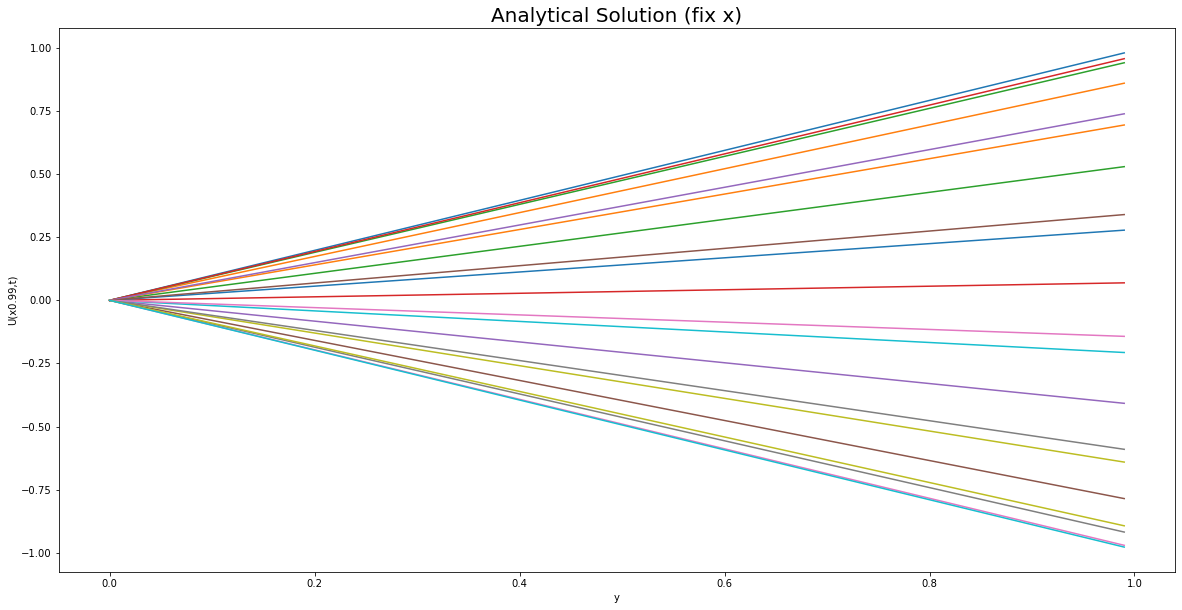

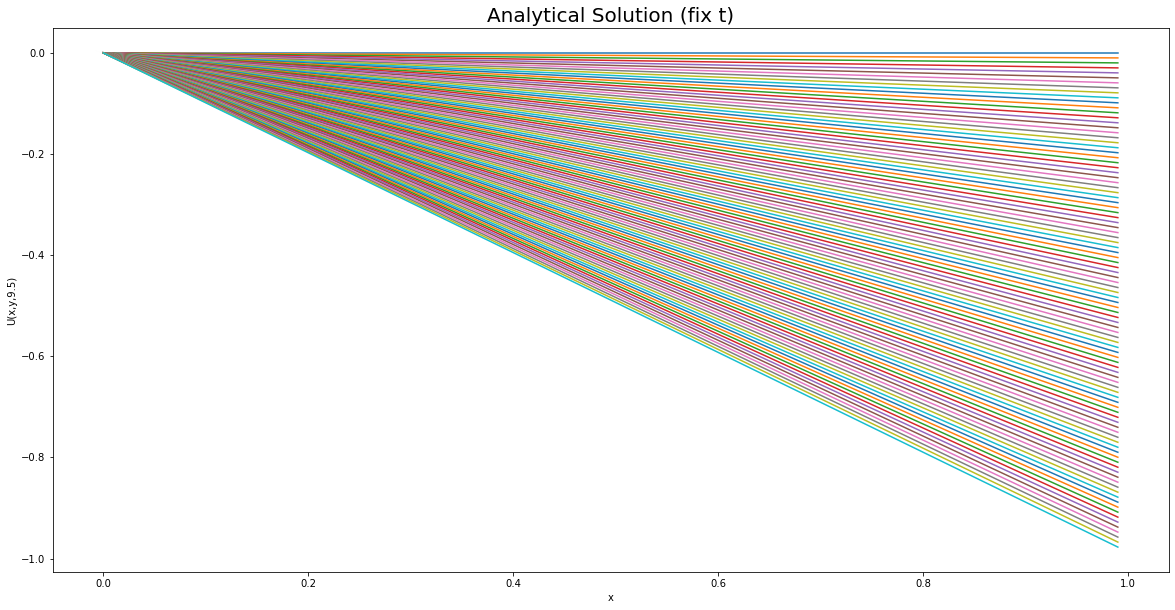

In [20]:
u_a = np.zeros((len(t),ny,nx))
for k in range(len(t)):
    for s in range(ny):
        for j in range(nx):
            u_a[k][s][j] = analytic(j * hx, s * hy, k * r)

fig = plt.figure(figsize=(20, 10))
for k in range(len(u_a)):
    plt.plot(x, u_a[k][-1])
plt.title('Analytical Solution (fix y)', fontsize = 20)
plt.xlabel('x')
plt.ylabel(f'U(x,{y[2]},t)')
plt.show()


fig = plt.figure(figsize=(20, 10))
for k in range(len(u_a)):
    plt.plot(y, u_a[k][:][-1])
plt.title('Analytical Solution (fix x)', fontsize = 20)
plt.xlabel('y')
plt.ylabel(f'U(x{x[-1]},t)')
plt.show()

fig = plt.figure(figsize=(20, 10))
for k in range(len(u_a[0])):
    plt.plot(x, u_a[-1][k][:])
plt.title('Analytical Solution (fix t)', fontsize = 20)
plt.xlabel('x')
plt.ylabel(f'U(x,y,{t[-1]})')
plt.show()
# fig = go.Figure()
# for k in range(len(u_a)):
#     fig.add_trace(go.Scatter(x=x, y=u_a[k][-1], name = f't={t[k]}'))
# fig.update_layout(title="Analytical Solution (fix y)",
#                   xaxis_title="x",
#                   yaxis_title=f"$U(x,{y[2]},t)$",
#                   template="plotly_dark")

# fig.show()
# fig = go.Figure()
# for k in range(len(u_a)):
#     fig.add_trace(go.Scatter(x=y, y=u_a[k][:][-1], name = f't={t[k]}'))
# fig.update_layout(title="Analytical Solution (fix x)",
#                   xaxis_title="y",
#                   yaxis_title=f"$U({x[-1]},y,t)$",
#                   template="plotly_dark")
# fig.show()
# fig = go.Figure()
# for k in range(len(u_a[0])):
#     fig.add_trace(go.Scatter(x=x, y=u_a[-1][k][:], name=f'y={round(y[k],2)}'))
# fig.update_layout(title="Analytical Solution (fix t)",
#                   xaxis_title="y",
#                   yaxis_title=f"$U(x,y,{t[-1]})$",
#                   template="plotly_dark")
# fig.show()


#fig = go.Figure()
#fig.add_trace(go.Surface(x=x, y=y, z=u_a[1][:][:]))

<a name = 'step4'></a>
# Схема переменных направлений

[К оглавлению](#content)

<a name = 'step4.1'></a>
## Теоретическая часть

Для начала введем пространственно-временную сетку: $$\omega_{h_1h_2}^\tau = \{x_i = ih_1, \ i=\overline{0,I},\ x_j = jh_2,\ j = \overline{0,J}:\ t^k = k\tau,\ k = 0,1,2,\ldots\}$$

В схеме метода переменных направлений (МПН) шаг по времени $\tau$ разбивается на число независимых пространственных переменных (в нашем двумерном случае, соответственно, на две). На каждом дробном временном слое один из пространственных дифференциальных операторов аппроксимируется неявно (по соответствующему координатному направлению осуществляются скалярные прогонки), а остальные явно. На следующем дробном шаге следующий по порядку дифференциальный оператор аппроксимируется неявно и так далее. В двумерном случае имеем

$$\begin{array}{l}\frac{u_{i,j}^{k+\frac{1}{2}} - u_{i,j}^k}{\frac{\tau}{2}} = \frac{a}{h_1^2}\left(u_{i+1\ j}^{k+\frac{1}{2}} - 2u_{ij}^{k+\frac{1}{2}} + u_{i-1\ j}^{k+\frac{1}{2}}\right) + \frac{a}{h_2^2}\left(u_{i\ j+1}^k - 2u^k_{ij}+u_{i\ j-1}^k\right) + f_{ij}^{k+\frac{1}{2}},\\
\frac{u_{ij}^{k+1}-u_{ij}^{k+\frac{1}{2}}}{\frac{\tau}{2}} = \frac{a}{h_1^2}\left(u_{i+1\ j}^{k+\frac{1}{2}} - 2u_{ij}^{k+\frac{1}{2}} + u_{i-1\ j}^{k+\frac{1}{2}}\right) + \frac{a}{h_2^2}\left(u_{i\ j+1}^{k+1} - 2u_{ij}^{k+1} + u_{i\ j-1}^{k+1}\right) + f_{ij}^{k+\frac{1}{2}}\end{array}.$$

В первой подсхеме на первом дробном шаге $\frac{\tau}{2}$ оператор $a\frac{\partial^2}{\partial x^2}$ аппроксимируется неявно, а оператор $a\frac{\partial^2}{\partial y^2}$ -- явно (весь конечно-разностный оператор по переменной $y$ переходит в правые части, так как $u_{ij}^k$ известно). С помощью скалярных прогонок в количестве, равном числу $J-I$, в направлении переменной $x$ получаем распределение сеточной функции $u_{ij}^{k+\frac{1}{2}}, \ i = \overline{1,I-1},\ j = \overline{1,J-1}$ на первом временном полуслое $t^{k+\frac{1}{2}} = t^k + \frac{\tau}{2}$

Во второй подсхеме наоборот $a\frac{\partial^2}{\partial x^2}$ аппроксимируется явно в момент времени $t^{k+\frac{1}{2}} = t^k+\frac{\tau}{2}$, оператор $a\frac{\partial^2}{\partial y^2}$ -- неявно на верхнем временном слое $t^{k+1} = (k+1)\tau$. Прогонка осуществляется в направлении переменной $y$ в количестве, равном числу $I-J$.

#### Достоинства

* В двумерном случае абсолютно устойчива
* Второй порядок точности по времени обеспечивает высокую точность метода

#### Недостоинства

* Условная устойчивость при числе пространственных переменных больше двух
* Условно устойчив в задачах со смешанными производными

<a name = 'step4.2'></a>

## Программная реализация

In [22]:
def alternative_directions(nx = 100, ny = 50, K = 20,  T = 10, par_a = 1.0):# Переменных направлений
    hx, hy, r = 1/nx, 1/ny, T/K
    x = np.arange(x0, xl + hx, hx)
    y = np.arange(y0, yl + hy, hy)
    time = np.arange(0, T + r, r)
    Cur_T = np.zeros((len(time), len(x), len(y)))

    for i in range(len(x)):
        for j in range(len(y)):
            Cur_T[0][i][j] = psi(x[i], y[j])
    for k in range(0, len(time)):
        for j in range(len(y)):
            Cur_T[k][0][j] = fx0(y[j], time[k], par_a)
            Cur_T[k][-1][j] = fxN(y[j], time[k], par_a)

    for k in range(0, len(time)):
        for i in range(len(x)):
            Cur_T[k][i][0] = fy0(x[i], time[k], par_a)

    for k in range(1, len(time)):
        k_half_table = np.zeros((len(x), len(y)))
        # k + 1/2
        for i in range(1, len(x) - 1):
            a = np.zeros(len(y))
            b = np.zeros(len(y))
            c = np.zeros(len(y))
            d = np.zeros(len(y))

            tmp = (par_a * r) / (hx**2**2 * 2)
            for j in range(1, len(y) - 1):
                a[j] = tmp
                b[j] = -2 * tmp - 1
                c[j] = tmp
                d[j] = (- par_a * r / (hy**2 * 2)) * \
                    (Cur_T[k - 1][i][j + 1] -
                     2 * Cur_T[k - 1][i][j] +
                     Cur_T[k - 1][i][j - 1]) -\
                    Cur_T[k - 1][i][j] + (r/2)*function(x[i],y[j],time[k]-r/2)

            alpha = 0
            betta = 1
            gamma = 1
            delta = 0
            b[0] = betta - alpha / hy
            c[0] = alpha / hy
            d[0] = fy0(x[i], time[k] - r / 2, par_a)

            a[-1] = - gamma / hy
            b[-1] = delta + gamma / hy
            d[-1] = fyN(x[i], time[k] - r / 2, par_a)

            ans = tma(a, b, c, d, len(d))
            k_half_table[i] = ans
            for j in range(len(y)):
                k_half_table[0][j] = fx0(y[j], time[k] - r / 2, par_a)
                k_half_table[-1][j] = fxN(y[j], time[k] - r / 2, par_a)

        for j in range(1, len(y) - 1):
            a = np.zeros(len(x))
            b = np.zeros(len(x))
            c = np.zeros(len(x))
            d = np.zeros(len(x))

            tmp = (par_a * r) / (hx**2**2 * 2)
            for i in range(1, len(x)):
                a[i] = tmp
                b[i] = -2 * tmp - 1
                c[i] = tmp
                d[i] = (- par_a * r / (hy**2 * 2)) * \
                    (k_half_table[i][j + 1] -
                     2 * k_half_table[i][j] +
                     k_half_table[i][j - 1]) -\
                    k_half_table[i][j] + (r/2)*function(x[i],y[j],time[k])

            alpha = 0
            betta = 1
            gamma = 0
            delta = 1
            b[0] = betta - alpha / hx
            c[0] = alpha / hx
            d[0] = fx0(y[j], time[k], par_a)

            a[-1] = - gamma / hx
            b[-1] = delta + gamma / hx
            d[-1] = fxN(y[j], time[k], par_a)

            ans = tma(a, b, c, d, len(d))
            for i in range(len(ans)):
                Cur_T[k][i][j] = ans[i]
            for j in range(len(y)):
                Cur_T[k][0][j] = fx0(y[j], time[k], par_a)
                Cur_T[k][-1][j] = fxN(y[j], time[k], par_a)

            for i in range(len(x)):
                Cur_T[k][i][0] = fy0(x[i], time[k], par_a)
                Cur_T[k][i][-1] = fyN(x[i], time[k], par_a) * hy\
                    + Cur_T[k][i][-2]

    for j in range(len(y)):
        Cur_T[-1][0][j] = fx0(y[j], time[-1], par_a)
        Cur_T[-1][-1][j] = fxN(y[j], time[-1], par_a)

    for i in range(len(x)):
        Cur_T[-1][i][0] = fy0(x[i], time[-1], par_a)

    return Cur_T[-1].transpose(), 'Alternative Directions', Cur_T

<a name = 'step4.3'></a>

## Исследования

In [23]:
def make_graph(func_name = alternative_directions, nx = 100, ny = 50,
               K = 20, T = 10):
    hx, hy = 1/nx, 1/ny
    #hx, hy = 1/nx, 1/ny
    zgrid, name,tmp = func_name(nx,ny,K,T)
    x = np.arange(x0, xl + hx, hx)
    y = np.arange(y0, yl + hy, hy)

    xgrid, ygrid = np.meshgrid(x, y)

    # to_ans_meth = ""
    analitic_grid = analytic(xgrid, ygrid, T, 1)

    err = abs(analitic_grid - zgrid)

    answer = zgrid
    for i in range(len(y)):
        answer[i][-1] = analitic_grid[i][-1]

    fig_surfaces = plotly.subplots.make_subplots(rows=1, cols=2,specs=[[{'type': 'surface'}, {'type': 'surface'}]],
                                                subplot_titles=("Analytical", name + " scheme"))
    fig_surfaces.add_trace(go.Surface(x=xgrid, y=ygrid, z=analitic_grid, name = 'Analytic', colorscale = 'Viridis',showscale=False), row = 1,col = 1)
    fig_surfaces.add_trace(go.Surface(x=xgrid, y=ygrid, z=answer, name=name, showscale=False), row = 1, col = 2)
    fig_surfaces.update_layout(template='plotly_dark', title = 'Comparison analytical and method solutions (Surfaces)')
    fig_surfaces.update_scenes(xaxis_title=dict(text = 'x'), yaxis_title = dict(text = 'y'), zaxis_title = dict(text = "U(x,y,t)"))
    fig_surfaces.show()
    
    
    
    line_marker = dict(color='#0066FF', width=2)
    lines = []
    lines.append(go.Scatter3d(x=xgrid[0], y=ygrid[0], z=analitic_grid[0], mode='lines', line=line_marker, name = name + ' method', legendgroup=1))
    for i, j, k in zip(xgrid[1:], ygrid[1:], analitic_grid[1:]):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker, showlegend=False))
    line_marker = dict(color='#ff0000', width=2)
    #my_layout = go.Layout({"title": "Views by publisher", scene = go.Scene(),
    #                       "showlegend": False})
    fig_wires = go.Figure(data = lines)
    fig_wires.update_layout(template="plotly_dark", title = 'Comparison analytical and method solutions (Wires)')
    fig_wires.update_scenes(xaxis_title=dict(text = 'x'), yaxis_title = dict(text = 'y'), zaxis_title = dict(text = "U(x,y,t)"))
    fig_wires.add_trace(go.Scatter3d(x=xgrid[0], y=ygrid[0], z=zgrid[0], mode='lines', line=line_marker, name = 'Analytic', legendgroup = 2))
    for i, j, k in zip(xgrid[1:], ygrid[1:], zgrid[1:]):
        fig_wires.add_trace(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker, showlegend=False))
    fig_wires.show()
    
    
    
    
    
    fig_error = go.Figure()
    fig_error.add_trace(go.Surface(x=xgrid, y=ygrid, z=err, showscale=False))
    fig_error.update_layout(template='plotly_dark', title = 'Error 3D')
    fig_error.show()
    
    

MAE:  1.0162761631757107e-05
MSE:  2.1678834098733008e-10


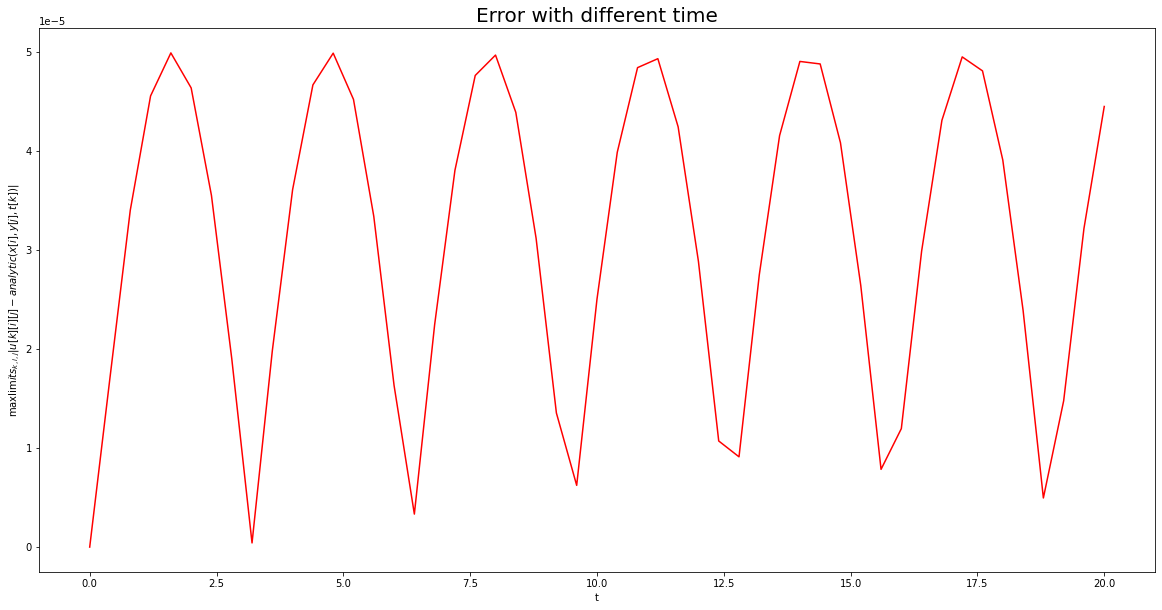

In [26]:
plot_error(alternative_directions, fix = None)

In [27]:
def different_nx(method = alternative_directions, start = 30, ny = 50, K = 100, T = 4):
    nxs = np.linspace(start - start/2, start + start/2, 10)
    nxs = nxs.astype(np.int)
    hy = 1/ny
    y = np.arange(y0, yl + hy, hy)
    r = T/K
    time = np.arange(0, T + r, r)
    hxs = []
    errors_mae, errors_mse = [],[]
    for i in tqdm(range(len(nxs))):
        hx = 1/nxs[i]
        hxs.append(hx)
        x = np.arange(x0, xl + hx, hx)
        u_tmp = method(nx=nxs[i], ny=ny, K=K, T=T)[-1]
        errors_mae.append(MAE(x,y,time,u_tmp))
        errors_mse.append(MSE(x,y,time,u_tmp))
    return hxs, errors_mae, errors_mse
def different_ny(method = alternative_directions, start = 30, nx = 60, K = 100, T = 4):
    nys = np.linspace(start - start/2, start + start/2, 10)
    nys = nys.astype(np.int)
    hx = 1/nx
    r = T/K
    hys = []
    x = np.arange(x0, xl + hx, hx)
    time = np.arange(0, T + r, r)
    errors_mae, errors_mse = [],[]
    for i in tqdm(range(len(nys))):
        hy = 1/nys[i]
        hys.append(hy)
        y = np.arange(y0, yl + hy, hy)
        u_tmp = method(nx=nx, ny=nys[i], K=K, T=T)[-1]
        errors_mae.append(MAE(x,y,time,u_tmp))
        errors_mse.append(MSE(x,y,time,u_tmp))
    return hys, errors_mae, errors_mse
    
def different_K(method = alternative_directions, start = 100, nx = 50, ny = 30, T = 4):
    hx = 1/nx
    hy = 1/ny
    ks = np.linspace(10, start + start/2, 10)
    ks = ks.astype(np.int)
    taus = []
    x = np.arange(x0, xl + hx, hx)
    y = np.arange(y0, yl + hy, hy)
    errors_mae, errors_mse = [],[]
    for i in tqdm(range(len(ks))):
        r = T/ks[i]
        taus.append(r)
        time = np.arange(0, T + r, r)    
        u_tmp = method(nx=nx, ny=ny, K=ks[i], T=T)[-1]
        errors_mae.append(MAE(x,y,time,u_tmp))
        errors_mse.append(MSE(x,y,time,u_tmp))
    return taus, errors_mae, errors_mse
 
    
hxs, errors_mae_nx, errors_mse_nx = different_nx()
hys, errors_mae_ny, errors_mse_ny = different_ny()
taus, errors_mae_t, errors_mse_t = different_K()

In [29]:
def plot_different_errors(step_name, errors_mae, errors_mse, steps):
    fig = plt.figure(figsize=(20, 10))
    plt.plot(steps, [math.log(i + 1e-40) for i in errors_mae], color = 'red')
    plt.title(f'Errors with different {step_name} step', fontsize = 20)
    plt.xlabel(f"$h_{step_name}$")
    plt.ylabel("MAE")
    plt.show()
    fig = plt.figure(figsize=(20, 10))
    plt.plot(steps, [math.log(i + 1e-40) for i in errors_mse], color = 'red')
    plt.title(f'Errors with different {step_name} step', fontsize = 20)
    plt.xlabel(f"$h_{step_name}$")
    plt.ylabel("MSE")
    plt.show()
    
#     fig_mae = go.Figure()
#     fig_mae.add_trace(go.Scatter(x=steps, y=errors_mae))
#     errors_mae = [math.log(i + 1e-40) for i in errors_mae]
#     fig_mae.update_layout(title = f'Errors with different {step_name} step', xaxis_title = f"$h_{step_name}$", yaxis_title="MAE",
#                          template='plotly_dark')
#     fig_mae.show()
#     fig_mse = go.Figure()
#     fig_mse.add_trace(go.Scatter(x=steps, y=errors_mse))
#     errors_mse = [math.log(i + 1e-40) for i in errors_mse]
#     fig_mse.update_layout(title = f'Errors with different {step_name} step', xaxis_title = f"$h_{step_name}$", yaxis_title="MSE",
#                          template='plotly_dark')
#     fig_mse.show()

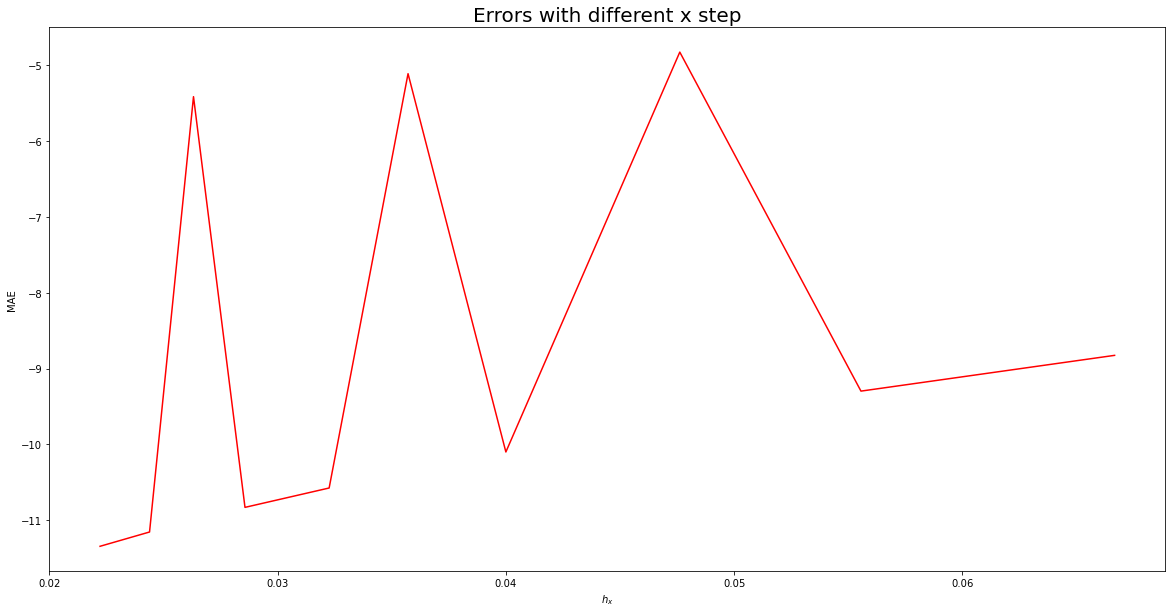

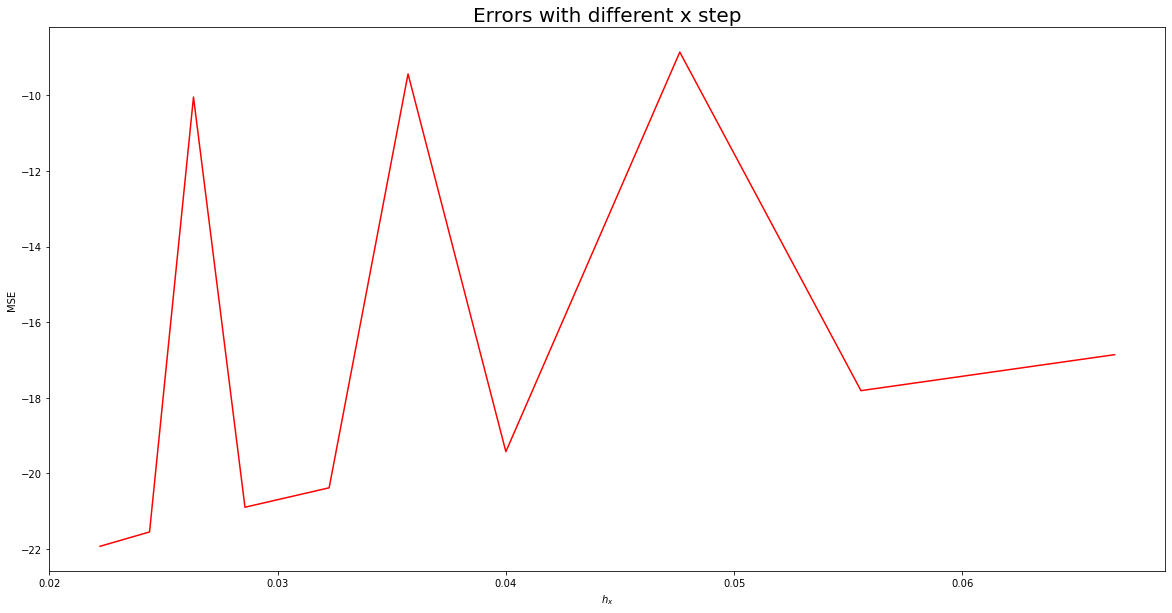

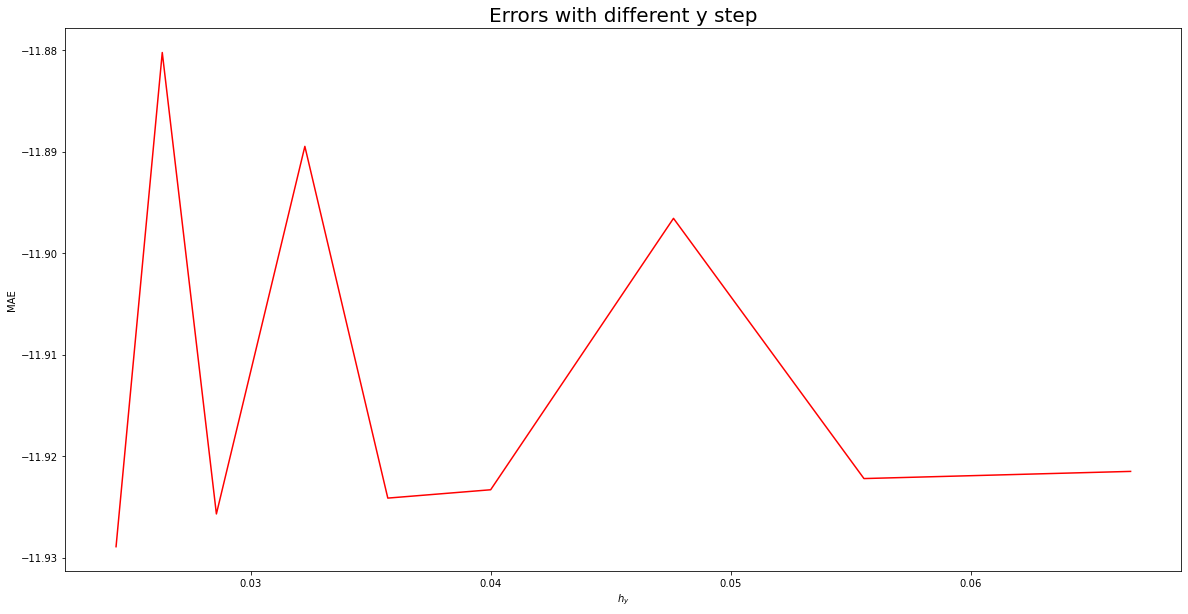

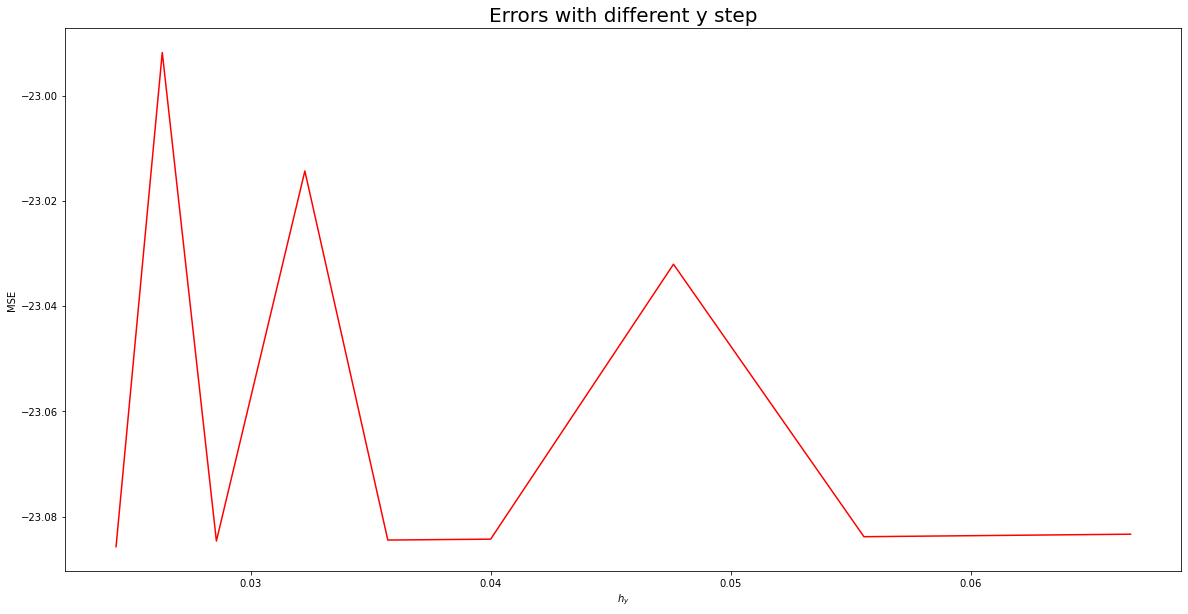

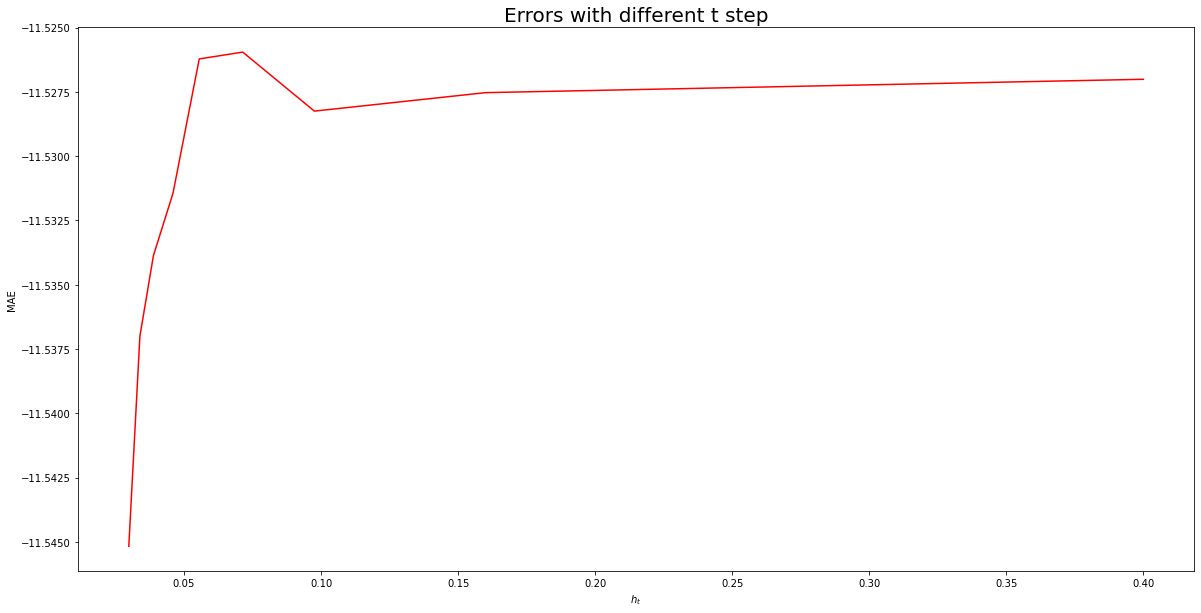

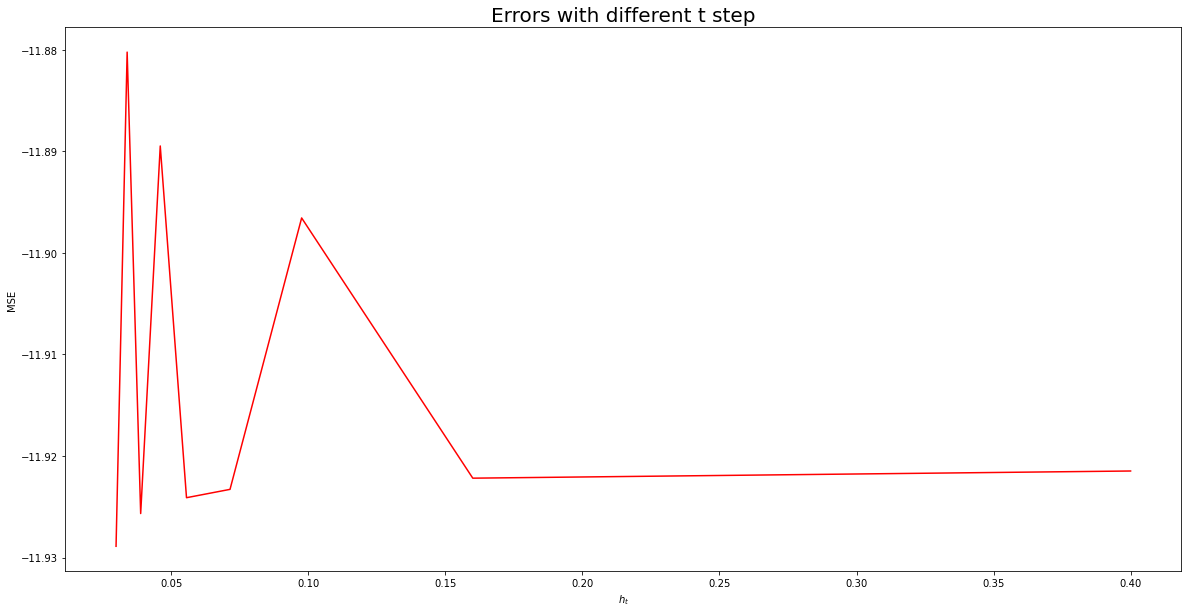

In [37]:
plot_different_errors('x', errors_mae_nx, errors_mse_nx, hxs)
plot_different_errors('y', errors_mae_ny[-1:0:-1], errors_mse_ny[-1:0:-1], hys[:-1])
plot_different_errors('t', errors_mae_t[-1:0:-1], errors_mae_ny[-1:0:-1], taus[:-1])

<a name = 'step5'></a>
# Метод дробных шагов

[К оглавлению](#content)

<a name = 'step5.1'></a>
## Теоретическая часть

Метод дробных шагов использует только неявные конечно-разностные операторы, что делает его абсолютно устойчивым в задачах, не содержащих смешанные производные. Схема метода дробных шагов имеет вид:
$$\begin{array}{l}\frac{u_{ij}^{k+\frac{1}{2}}-u^k_{ij}}{\tau} = \frac{a}{h_1^2} \cdot \left( u_{i+1\ j}^{k+\frac{1}{2}} - 2u_{ij}^{k+\frac{1}{2}} + u_{i-1\ j}^{k+\frac{1}{2}} \right) + \frac{f^k_{ij}}{2},\\
\frac{u_{ij}^{k+1} - u_{ij}^{k+\frac{1}{2}}}{\tau} = \frac{a}{h_2^2}\cdot \left(u_{k+1\ j}^{k+\frac{1}{2}} - 2u_{ij}^{k+1} + u_{i\ j-1}^{k+1}\right) + \frac{f_{ij}^{k+1}}{2}
\end{array}$$

С помощью чисто неявной первой подсхемы осуществляются скалярные прогонки в направлении оси $x$ в количестве, равном $J-I$, в результате чего получаем сеточную функцию $u_{ij}^{k+\frac{1}{2}}$. На втором дробном шаге по времени с помощью второй подсхемы производится прогонка в направлении оси $y$ в количестве, равном $I-1$, в  результате чего имеем $u_{ij}^{k+1}$


#### Достоинства:

* Абсолютная устойчивость 
* Запас устойчивости для задач, содержащих смешанные производные

#### Недостатки:

* На каждом дробном шаге достигается частичная аппроксимация (полна достигается на последнем дробном шаге)
* Схема имеет первый порядок точности по времени

<a name = 'step5.2'></a>
## Программная реализация

In [38]:
def fractional_steps(nx = 100, ny = 50, K = 20, T = 10, par_a = 1.0):# Переменных направлений
    hx, hy, r = 1/nx, 1/ny, T/K
    x = np.arange(x0, xl + hx, hx)
    y = np.arange(y0, yl + hy, hy)
    time = np.arange(0, T + r, r)

    Cur_T = np.zeros((len(time), len(x), len(y)))
    ###
    for i in range(len(x)):
        for j in range(len(y)):
            Cur_T[0][i][j] = psi(x[i], y[j])

    for k in range(0, len(time), 2):
        for j in range(len(y)):
            Cur_T[k][0][j] = fx0(y[j], time[k], par_a)
            Cur_T[k][-1][j] = fxN(y[j], time[k], par_a)
        for i in range(len(x)):
            Cur_T[k][i][0] = fy0(x[i], time[k], par_a)    
            Cur_T[k][i][-1] = fyN(x[i], time[k], par_a)           

    ###
#убрать полушаг
    for k in range(2, len(time), 2):
        # print(k)
        for j in range(1, len(y) - 1):

            a = np.zeros(len(x))
            b = np.zeros(len(x))
            c = np.zeros(len(x))
            d = np.zeros(len(x))

            tmp = par_a * r / hx**2
            for i in range(1, len(x) - 1):
                a[i] = tmp
                b[i] = -2 * tmp - 1
                c[i] = tmp
                d[i] = - Cur_T[k - 2][i][j]  #- (r/2)*function(x[i],y[j],time[k-2])

            b[0] = 1
            c[0] = 0
            d[0] = fx0(y[j], time[k-1], par_a)

            a[-1] = 0
            b[-1] = 1
            d[-1] = fxN(y[j], time[k-1], par_a)

            ans = tma(a, b, c, d, len(d))
            # print(ans)
            # print("::::::::::::")
            
            for i in range(1, len(x) - 1):
                Cur_T[k-1][i][j] = ans[i]
                Cur_T[k-1][i][0] = fy0(x[i], time[k-1], par_a)
                Cur_T[k-1][i][-1] = fyN(x[i], time[k-1], par_a)

        for j in range(len(y)):
            Cur_T[k-1][0][j] = fx0(y[j], time[k-1], par_a)
            Cur_T[k-1][-1][j] = fxN(y[j], time[k-1], par_a)
        # k + 1
        for i in range(1, len(x)):
            a = np.zeros(len(y))
            b = np.zeros(len(y))
            c = np.zeros(len(y))
            d = np.zeros(len(y))


            tmp = par_a * r / hy**2
            for j in range(1, len(y) - 1):
                a[j] = tmp
                b[j] = -2 * tmp - 1
                c[j] = tmp
                d[j] = - Cur_T[k-1][i][j] #- (r/2)*function(x[i],y[j],time[k])

            b[0] = 1
            c[0] = 0
            d[0] = fy0(x[i], time[k], par_a)

            a[-1] = 0
            b[-1] = 1
            d[-1] = fyN(x[i], time[k], par_a)

            ans = tma(a, b, c, d, len(d))
            for j in range(len(y)):
                Cur_T[k][i][j] = ans[j]
                Cur_T[k][i][0] = fy0(x[i], time[k], par_a)
                Cur_T[k][i][-1] = fyN(x[i], time[k], par_a)               

        for i in range(len(x)):
            Cur_T[k][i][0] = fy0(x[i], time[k], par_a)
            Cur_T[k][i][-1] = fyN(x[i], time[k], par_a)
    return Cur_T[-1].transpose(), 'Fractional Steps', Cur_T

<a name = 'step5.3'></a>
## Исследования

MAE:  0.0114942575042906
MSE:  0.0002702723695563922


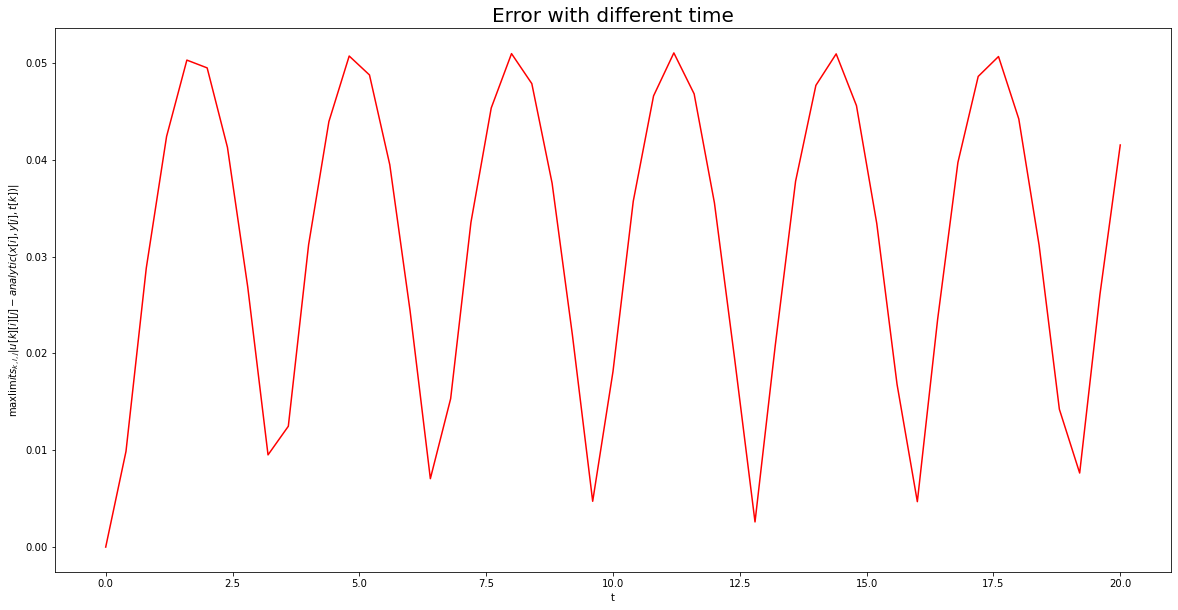

In [39]:
plot_error(fractional_steps, fix = None)

In [40]:
hxs, errors_mae_nx, errors_mse_nx = different_nx(method=fractional_steps)
hys, errors_mae_ny, errors_mse_ny = different_ny(method=fractional_steps)
taus, errors_mae_t, errors_mse_t = different_K(method=fractional_steps)

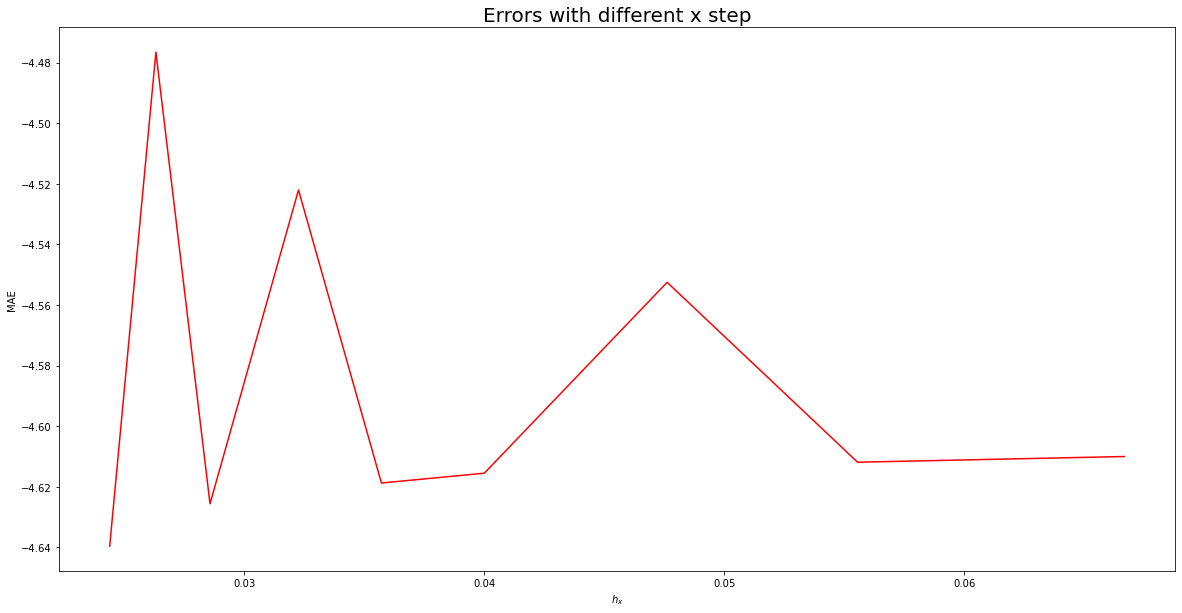

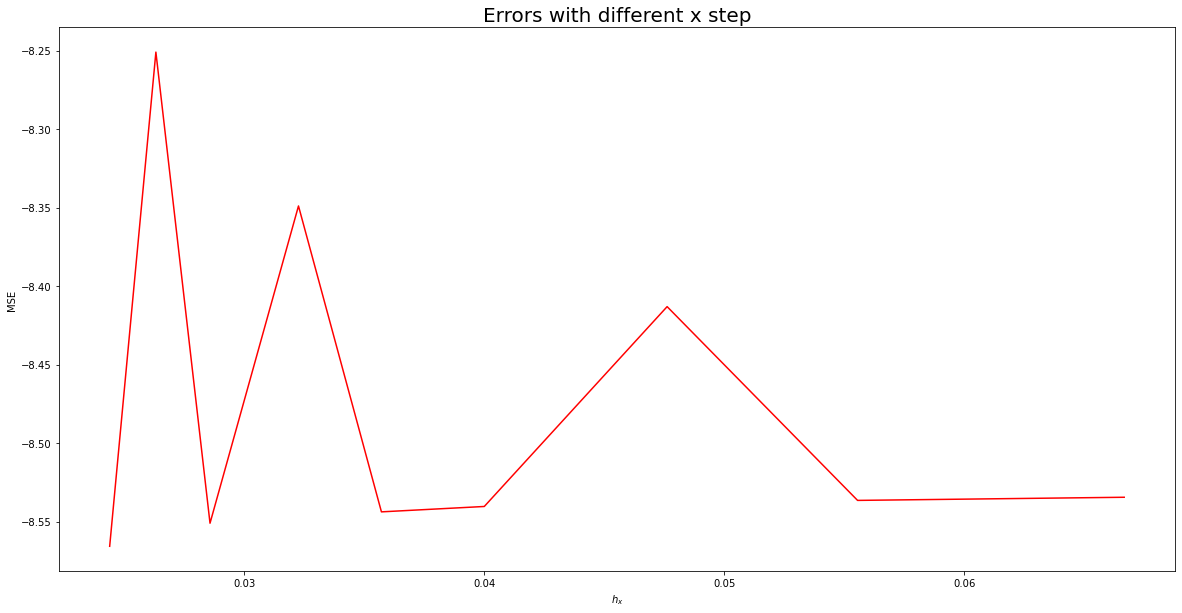

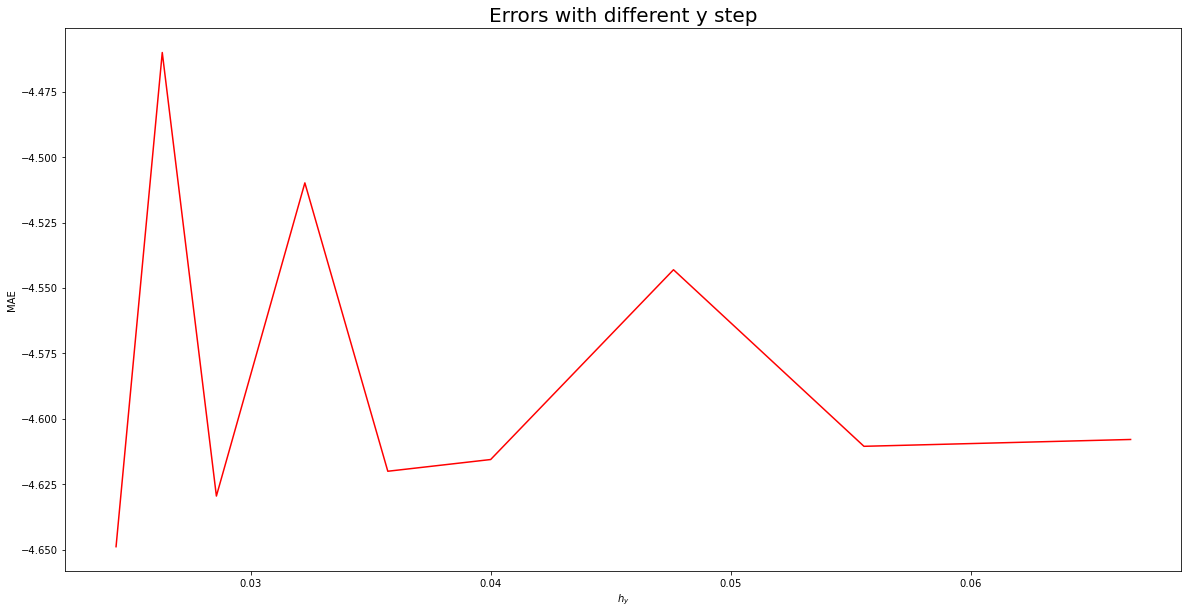

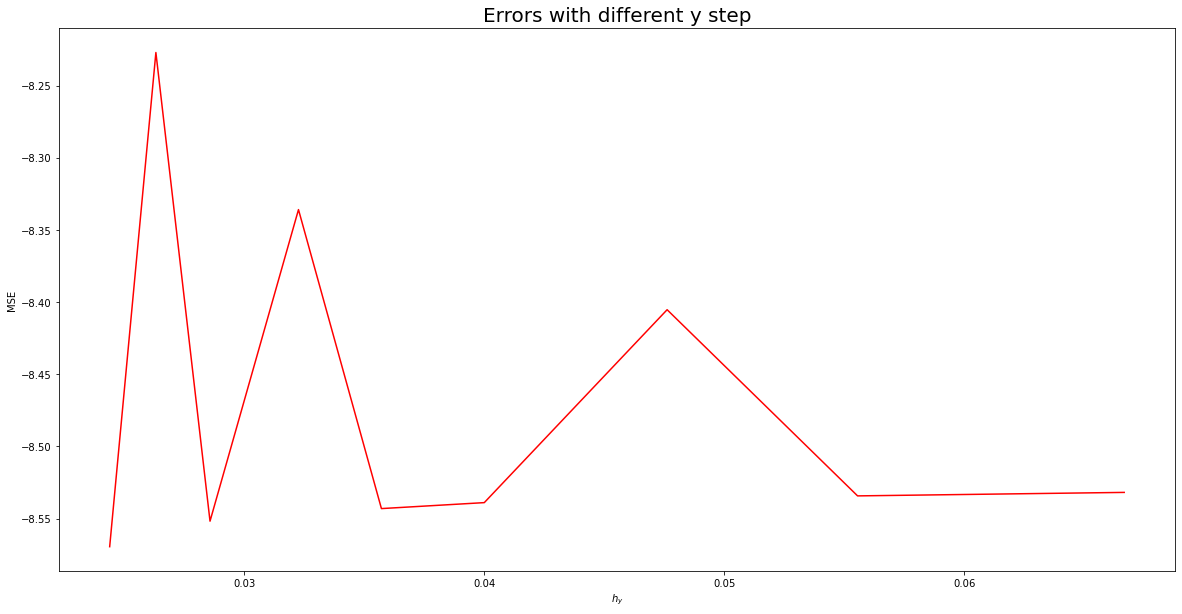

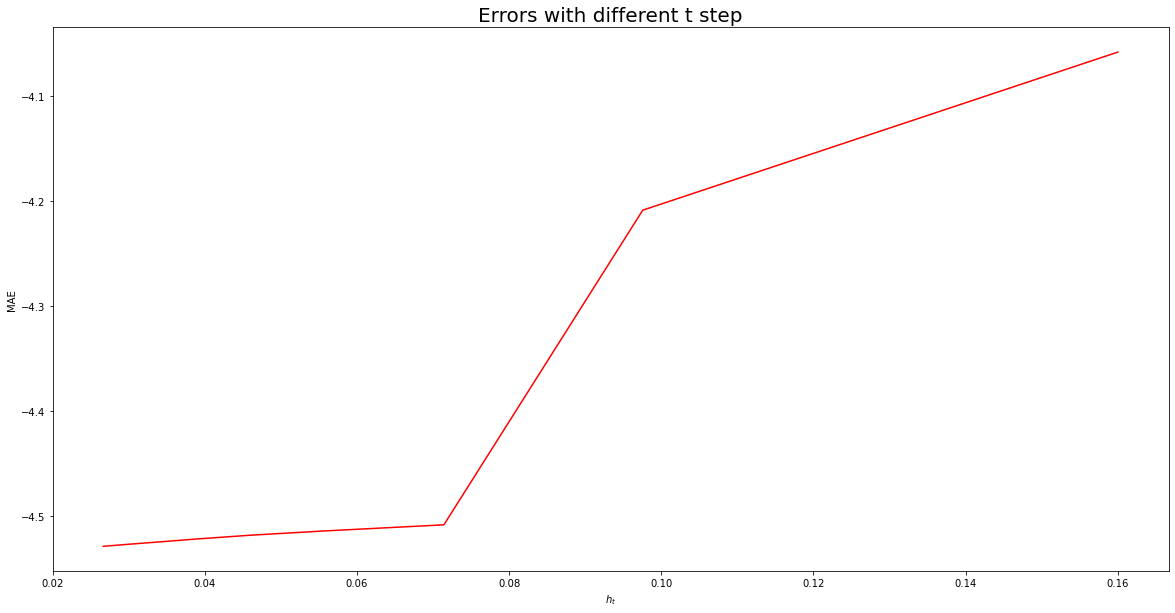

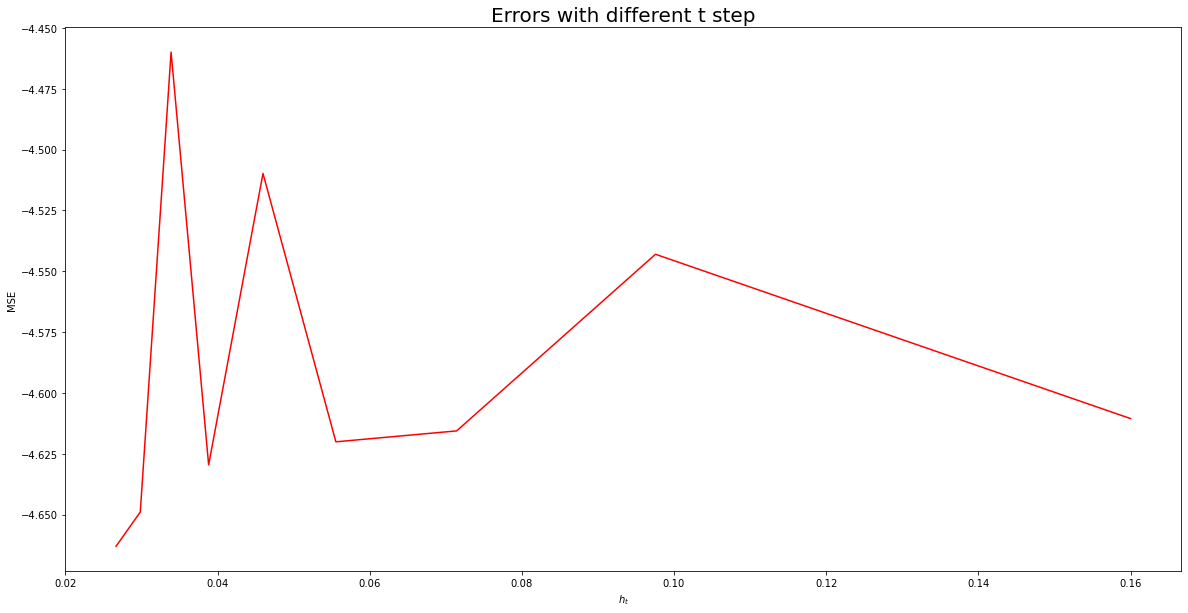

In [45]:
plot_different_errors('x', errors_mae_nx[-1:0:-1], errors_mse_nx[-1:0:-1], hxs[:-1])
plot_different_errors('y', errors_mae_ny[-1:0:-1], errors_mse_ny[-1:0:-1], hys[:-1])
plot_different_errors('t', errors_mae_t[-1:0:-1], errors_mae_ny[:-1], taus[-1:0:-1])